<a href="https://colab.research.google.com/github/kyletran77/Coursera_Capstone/blob/master/Week_5_Final_Proper_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import libraries**

In [0]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
from sklearn.cluster import KMeans
import folium
import html
import sys

In [0]:
url =  'https://en.wikipedia.org/wiki/San_Francisco_Bay_Area'
html = requests.get(url)
soup = BeautifulSoup(html.text, 'html5lib')
tables = soup.find('table',class_ = 'collapsible')


**2. Create Data from Wikipedia**

In [0]:
data = {
    'County': ['Alameda',
'Contra Costa',
'Marin',
'Napa',
'San Francisco',
'San Mateo',
'Santa Clara',
'Solano',
'Sonoma'],
    'Population' : ['1,494,876',
'1,037,817',
'250,666',
'135,377',
'870,887',
'711,622',
'1,762,754',
'411,620',
'478,551'],
    'Median Income' : ['87,012',
'93,437',
'113,826',
'79,884',
'87,329',
'104,370',
'103,255',
'79,316',
'78,227'], 'Latitude':[37.7799, 37.8584, 38.0834, 38.2975,37.7749,37.5630, 37.3541, 38.3105, 38.2919 ], 'Longitude':[-122.2282, -121.9018,-122.7633,-122.2869, -122.4194, -122.3255,-121.9552, -121.9018, -122.4580]
}

In [36]:
sf = pd.DataFrame(data)#convert into dataframe
sf.head(20)

,County,Population,Median Income,Latitude,Longitude
0,Alameda,"1,494,876","87,012",37.7799,-122.2282
1,Contra Costa,"1,037,817","93,437",37.8584,-121.9018
2,Marin,"250,666","113,826",38.0834,-122.7633
3,Napa,"135,377","79,884",38.2975,-122.2869
4,San Francisco,"870,887","87,329",37.7749,-122.4194
5,San Mateo,"711,622","104,370",37.5630,-122.3255
6,Santa Clara,"1,762,754","103,255",37.3541,-121.9552
7,Solano,"411,620","79,316",38.3105,-121.9018
8,Sonoma,"478,551","78,227",38.2919,-122.4580


**3. FourSquare API**

In [0]:
client_id = 'EDLNTKPZ3EK0BQCNPOENJWUZ21U14QFXLE35CW1E5PMAXBDR' #FourSquare Information
secret = 'PM2RB3RBOHGYKVYB4EJGKRFXVBGE4SGJSJX4IORGQ5TLJEN1'
version = '20180605'
LIMIT='100'

In [0]:
from geopy.geocoders import Nominatim #import lib to find locations


In [39]:
sf.dtypes

County            object
Population        object
Median Income     object
Latitude         float64
Longitude        float64
dtype: object

In [0]:
address = 'San Francisco' # address for location

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)#locate geocode for address
latitude = location.latitude
longitude = location.longitude
cat = '4bf58dd8d48988d17f941735'

**4. Create a Folium Map**

In [41]:
map_sf = folium.Map(location =[latitude, longitude], zoom_start = 8)#folium map using lat, long 

for lat, lng, cty, inc, pop in zip(sf['Latitude'], sf['Longitude'], sf['County'], sf['Median Income'], sf['Population']):
  label = '{}'.format(cty,)# unzip each of the columns to format folii=um
  l = folium.Popup(label, parse_html = True)
  folium.CircleMarker(
        [lat, lng],
        radius = 10,
        popup = l,
        color = 'red',
        fill =True,
        fill_color = '#3186cc',
        fill_opacity = 0.5).add_to(map_sf)#create the labeling using a red, late with a gray center
map_sf

**5. Get Venues**

In [0]:
import json
from pandas.io.json import json_normalize
radius = 10000

In [0]:
def getNearbyTheaters(county, latitudes, longitudes):#function to get venues
  
  theaterslist=[]
  
  for cty, lat, lng in zip(county, latitudes, longitudes):    
     #use the foursquare api with the information needed
    url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            client_id, 
            secret, 
            version, 
            lat, 
            lng, 
            radius,
            cat,# category id for movies
            LIMIT)        
    results = requests.get(url).json()['response']['venues']
    
    for v in results:
        venue_name = v['name']
        venue_lat = v['location']['lat']
        venue_lng = v['location']['lng']
        venue_categories = v['categories'][0]['name']
        
        theaterslist.append([(cty,
                             lat, 
                             lng,
                             venue_name,
                             venue_lat,
                             venue_lng,
                             
                             )])
  theaters = pd.DataFrame([v for theaterlist in theaterslist for v in theaterlist])
  theaters.columns = ['County', 'County Latitude', 'County Longitude', 'Venue Name', 'Venue Latitude', 'Venue Longitude']
    
  return theaters


In [0]:
theaters_data = getNearbyTheaters(county = sf['County'],
                      latitudes = sf['Latitude'],
                      longitudes = sf['Longitude'])

In [45]:
with pd.option_context('display.max_rows', 999):#display all data to get a better sense
  print(theaters_data)

            County  County Latitude  ...  Venue Latitude Venue Longitude
0          Alameda          37.7799  ...       37.785913     -122.223073
1          Alameda          37.7799  ...       37.813983     -122.267451
2          Alameda          37.7799  ...       37.811444     -122.247767
3          Alameda          37.7799  ...       37.764680     -122.243946
4          Alameda          37.7799  ...       37.808136     -122.270670
5          Alameda          37.7799  ...       37.833329     -122.292075
6          Alameda          37.7799  ...       37.867997     -122.268129
7          Alameda          37.7799  ...       37.805401     -122.268997
8          Alameda          37.7799  ...       37.708818     -122.132881
9          Alameda          37.7799  ...       37.786057     -122.318161
10         Alameda          37.7799  ...       37.714664     -122.145055
11         Alameda          37.7799  ...       37.870856     -122.266455
12         Alameda          37.7799  ...       37.7

In [47]:
theaters_data.head(1000)

,County,County Latitude,County Longitude,Venue Name,Venue Latitude,Venue Longitude
0,Alameda,37.7799,-122.2282,Theater 5,37.785913,-122.223073
1,Alameda,37.7799,-122.2282,New Parkway Theater,37.813983,-122.267451
2,Alameda,37.7799,-122.2282,Grand Lake Theater,37.811444,-122.247767
3,Alameda,37.7799,-122.2282,Alameda Theatre & Cineplex,37.764680,-122.243946
4,Alameda,37.7799,-122.2282,Fox Theater,37.808136,-122.270670
5,Alameda,37.7799,-122.2282,AMC Bay Street 16,37.833329,-122.292075
6,Alameda,37.7799,-122.2282,United Artists Berkeley 7,37.867997,-122.268129
7,Alameda,37.7799,-122.2282,Bay Area Childrens Theatre Company,37.805401,-122.268997
8,Alameda,37.7799,-122.2282,Bal Theater,37.708818,-122.132881
9,Alameda,37.7799,-122.2282,Bay Area International Children's Film Featival,37.786057,-122.318161


**6. Counts**

In [48]:
happyth = theaters_data.groupby('County').count()# get the counts for each venue
happyth.index = range(9)
happyth['County'] = sf['County']
happyth.head(10)

,County Latitude,County Longitude,Venue Name,Venue Latitude,Venue Longitude,County
0,46,46,46,46,46,Alameda
1,4,4,4,4,4,Contra Costa
2,3,3,3,3,3,Marin
3,9,9,9,9,9,Napa
4,50,50,50,50,50,San Francisco
5,16,16,16,16,16,San Mateo
6,45,45,45,45,45,Santa Clara
7,4,4,4,4,4,Solano
8,6,6,6,6,6,Sonoma


In [49]:
happyth.dtypes #check types

County Latitude      int64
County Longitude     int64
Venue Name           int64
Venue Latitude       int64
Venue Longitude      int64
County              object
dtype: object

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
x=happyth['County']
y=happyth['Venue Name']

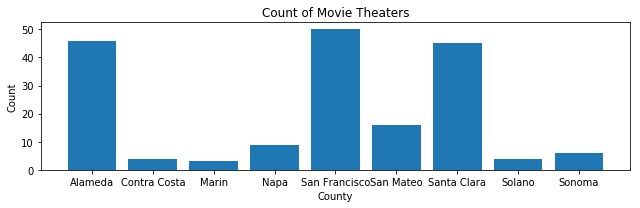

In [51]:
x_pos = [i for i, _ in enumerate(x)]# bar plot for the counts
plt.figure(figsize = (9, 3
                     ))
plt.bar(x_pos, y, align='center', width=0.8)
plt.xlabel('County', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of Movie Theaters')

plt.xticks(x_pos, happyth['County'], fontsize=10)
plt.tight_layout()
plt.show()

**7. One-hot Encoding**

In [52]:
sf_hot = pd.get_dummies(theaters_data['Venue Name'], prefix = "", prefix_sep = '')
sf_hot['County'] = theaters_data['County']

sf_hot.head()

,"""P"" Street Movie Theater",150 Van Ness Movie Theatre,3Below,4 Star Theatre,7-11 Redbox Movies,A Night To Remember(1958),AAFES Real Time Theater,AMC Bay Street 16,AMC Dine-In Kabuki 8,AMC Mercado,AMC Mercado 20,AMC Metreon 16,AMC Saratoga 14,Action Theater,Al Samman Movie Theater,Alameda Theatre & Cineplex,Alamo Drafthouse Cinema,Americana Movie Theatre,Artist's Television Access,Auction By The Bay Theater,Auditorium 11 - XD Extreme Digital Theater,Avenue Theater,BAMPFA,Bal Theater,Balboa Theatre,Bay Area Childrens Theatre Company,Bay Area International Children's Film Featival,Berkeley 7,Bose 2 Cinéplex,Brenden Vacaville 16,C St. Cinema,Cadillac Theatre,California Theatre,Castro Theatre,Center Street Summer Cinema,Century 12 San Mateo,Century 16 Suncoast,Century 20 Daly City,Century 20 Great Mall and XD,Century Blackhawk Plaza,...,Soto Theater @ Sobrato CET Center,Sundown Cinema,Surf for Life movie night,T.I. 108 Crew HQ,THE LOT,Temescal Street Cinema,The Dungeon,The Hackworth IMAX Dome Theater (at The Tech),The House of Schmoo,The Infinity - Fitness Center,The Land of Moving Pictures,The Orinda Theater,The Retro Dome at the Century 21,The Screening Room at The Uptown,The Tap Den,The Widtfeldt Theater,Theater 5,Theater Number 11,Tiburon Playhouse,Titanic 3D,Tivoli,Towne 3 Cinemas,Travis Theatre,UA Stadium,United Artists Berkeley 7,United Artists Stonestown Twin,Variety Screening Room,Victoria Theatre,Vogue Theater,Waterfront Flicks,Willow Park Bldg #5,Yerba Buena Center for the Arts,Zaentz Media Center,Zune Marketplace,hollywood video,movie theatre,roxy theater santa rosa,the room,united artist theaters,County
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Alameda
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Alameda
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Alameda
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Alameda
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Alameda


In [53]:
sf_group = sf_hot.groupby('County').mean().reset_index()#gather by counties
sf_group

,County,"""P"" Street Movie Theater",150 Van Ness Movie Theatre,3Below,4 Star Theatre,7-11 Redbox Movies,A Night To Remember(1958),AAFES Real Time Theater,AMC Bay Street 16,AMC Dine-In Kabuki 8,AMC Mercado,AMC Mercado 20,AMC Metreon 16,AMC Saratoga 14,Action Theater,Al Samman Movie Theater,Alameda Theatre & Cineplex,Alamo Drafthouse Cinema,Americana Movie Theatre,Artist's Television Access,Auction By The Bay Theater,Auditorium 11 - XD Extreme Digital Theater,Avenue Theater,BAMPFA,Bal Theater,Balboa Theatre,Bay Area Childrens Theatre Company,Bay Area International Children's Film Featival,Berkeley 7,Bose 2 Cinéplex,Brenden Vacaville 16,C St. Cinema,Cadillac Theatre,California Theatre,Castro Theatre,Center Street Summer Cinema,Century 12 San Mateo,Century 16 Suncoast,Century 20 Daly City,Century 20 Great Mall and XD,...,Sonomawood,Soto Theater @ Sobrato CET Center,Sundown Cinema,Surf for Life movie night,T.I. 108 Crew HQ,THE LOT,Temescal Street Cinema,The Dungeon,The Hackworth IMAX Dome Theater (at The Tech),The House of Schmoo,The Infinity - Fitness Center,The Land of Moving Pictures,The Orinda Theater,The Retro Dome at the Century 21,The Screening Room at The Uptown,The Tap Den,The Widtfeldt Theater,Theater 5,Theater Number 11,Tiburon Playhouse,Titanic 3D,Tivoli,Towne 3 Cinemas,Travis Theatre,UA Stadium,United Artists Berkeley 7,United Artists Stonestown Twin,Variety Screening Room,Victoria Theatre,Vogue Theater,Waterfront Flicks,Willow Park Bldg #5,Yerba Buena Center for the Arts,Zaentz Media Center,Zune Marketplace,hollywood video,movie theatre,roxy theater santa rosa,the room,united artist theaters
0,Alameda,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.021739,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.021739,0.00,0.000000,0.00,0.021739,0.000000,0.00,0.021739,0.021739,0.00,0.021739,0.021739,0.021739,0.000000,0.00,0.000000,0.000000,0.021739,0.00,0.021739,0.0000,0.0000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.021739,0.000000,0.000000,0.0000,0.00,0.021739,0.021739,0.000000,0.021739,0.00,0.00,0.021739,0.0000,0.00,0.000000,0.021739,0.000000,0.00,0.021739,0.021739,0.00,0.00,0.00,0.00,0.021739,0.000000,0.00,0.021739,0.0000,0.021739,0.021739,0.021739,0.00,0.021739
1,Contra Costa,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.0000,0.0000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00,0.00,0.25,0.000000,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.25,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.000000
2,Marin,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.0000,0.0000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.000000
3,Napa,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.111111,0.00,0.000000,0.111111,0.000000,0.00,0.000000,0.0000,0.0000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00000

In [0]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn import metrics

**8. K-Means**

In [0]:
distortions = [] #lists for the elbow method
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
sf_group = sf_group.drop('County', 1)
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(sf_group) 
    kmeanModel.fit(sf_group)     
      
    distortions.append(sum(np.min(cdist(sf_group, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / sf_group.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(sf_group, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / sf_group.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

In [56]:
for key,val in mapping1.items(): #values for the elbow method
    print(str(key)+' : '+str(val)) 

1 : 0.33247215163463584
2 : 0.26853381113091834
3 : 0.21357044228017683
4 : 0.15794785892360375
5 : 0.10441407456418432
6 : 0.06719263840400523
7 : 0.03933717185612172
8 : 0.021733762085414478
9 : 0.0


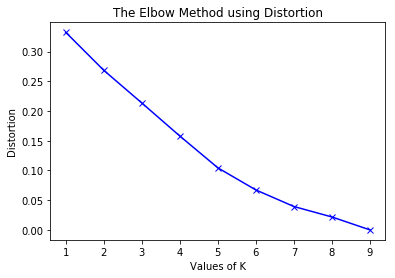

In [57]:

plt.plot(K, distortions, 'bx-') #plotting the elbow method
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [58]:
from sklearn.cluster import KMeans#create labels for the clusters
k=5
sfcluster = sf_group
kmeans = KMeans(n_clusters = k, random_state = 0).fit(sfcluster)
kmeans.labels_[0:100]

array([0, 3, 2, 0, 0, 0, 0, 4, 1], dtype=int32)

In [60]:
sfcluster = sf
sfcluster['Cluster Labels'] = kmeans.labels_
sfcluster = sfcluster.merge(sf.set_index('County'), on='County', how = 'left')
sfcluster.head(10)#merge the tables with the labels

,County,Population_x,Median Income_x,Latitude_x,Longitude_x,Cluster Labels_x,Population_y,Median Income_y,Latitude_y,Longitude_y,Cluster Labels_y
0,Alameda,"1,494,876","87,012",37.7799,-122.2282,0,"1,494,876","87,012",37.7799,-122.2282,0
1,Contra Costa,"1,037,817","93,437",37.8584,-121.9018,3,"1,037,817","93,437",37.8584,-121.9018,3
2,Marin,"250,666","113,826",38.0834,-122.7633,2,"250,666","113,826",38.0834,-122.7633,2
3,Napa,"135,377","79,884",38.2975,-122.2869,0,"135,377","79,884",38.2975,-122.2869,0
4,San Francisco,"870,887","87,329",37.7749,-122.4194,0,"870,887","87,329",37.7749,-122.4194,0
5,San Mateo,"711,622","104,370",37.5630,-122.3255,0,"711,622","104,370",37.5630,-122.3255,0
6,Santa Clara,"1,762,754","103,255",37.3541,-121.9552,0,"1,762,754","103,255",37.3541,-121.9552,0
7,Solano,"411,620","79,316",38.3105,-121.9018,4,"411,620","79,316",38.3105,-121.9018,4
8,Sonoma,"478,551","78,227",38.2919,-122.4580,1,"478,551","78,227",38.2919,-122.4580,1


In [61]:
sfcluster = sfcluster.drop(sfcluster[['Population_y',	'Median Income_y',	'Latitude_y',	'Longitude_y',	'Cluster Labels_y']], axis= 1)
sfcluster.head(10)#drop the duplicate columns

,County,Population_x,Median Income_x,Latitude_x,Longitude_x,Cluster Labels_x
0,Alameda,"1,494,876","87,012",37.7799,-122.2282,0
1,Contra Costa,"1,037,817","93,437",37.8584,-121.9018,3
2,Marin,"250,666","113,826",38.0834,-122.7633,2
3,Napa,"135,377","79,884",38.2975,-122.2869,0
4,San Francisco,"870,887","87,329",37.7749,-122.4194,0
5,San Mateo,"711,622","104,370",37.5630,-122.3255,0
6,Santa Clara,"1,762,754","103,255",37.3541,-121.9552,0
7,Solano,"411,620","79,316",38.3105,-121.9018,4
8,Sonoma,"478,551","78,227",38.2919,-122.4580,1


In [62]:
sfcluster.head(10)

,County,Population_x,Median Income_x,Latitude_x,Longitude_x,Cluster Labels_x
0,Alameda,"1,494,876","87,012",37.7799,-122.2282,0
1,Contra Costa,"1,037,817","93,437",37.8584,-121.9018,3
2,Marin,"250,666","113,826",38.0834,-122.7633,2
3,Napa,"135,377","79,884",38.2975,-122.2869,0
4,San Francisco,"870,887","87,329",37.7749,-122.4194,0
5,San Mateo,"711,622","104,370",37.5630,-122.3255,0
6,Santa Clara,"1,762,754","103,255",37.3541,-121.9552,0
7,Solano,"411,620","79,316",38.3105,-121.9018,4
8,Sonoma,"478,551","78,227",38.2919,-122.4580,1


**9.Plot Locations**

In [63]:
map_cluster = folium.Map(location =[latitude, longitude], zoom_start = 8)#folium map using lat, long 

cluster_color = {}
for cluster in range(k):
    cluster_color[cluster]= '#%02X%02X%02X' % tuple(np.random.choice(range(256), size=3))

markers_colors = []
for lat, lng, cty, cluster,  in zip(sfcluster['Latitude_x'], sfcluster['Longitude_x'], sfcluster['County'], sfcluster['Cluster Labels_x']):
  
  label = 'Cluster ' + str(cluster)+ '/ ' + str(cty)# unzip each of the columns to format folii=um
  l = folium.Popup(label, parse_html = True)
  folium.CircleMarker(
        [lat, lng],
        tooltip = label,
        radius = 10,
        popup = l,
        color = cluster_color[cluster],
        fill =True,
        fill_color = cluster_color[cluster],
        fill_opacity = 0.5).add_to(map_cluster)#create the labeling using a red, late with a gray center
map_cluster